# "Продвинутый Python". Магистерская программа ВШЭ.

**Цель курса**: получить предстваление о принципах создания сервисов и реализовать их в собственном ML-проекте.

**Ключевые навыки**: ООП, Django, luigi

### Отчётность

Зачётные баллы будут даваться за:

1) __Курсовой проект__ 

В курсовом проекте необходимо будет сделать сервис, например, для решения какой-нибудь ML-задачи (но не обязательно). Список требований к сервису будет озвучен позже. За проект можно получить до **6 баллов**, причем проект должен сдаваться не за один раз. 

2) __Контрольные работы, контесты__ (но это не точно)

Проводятся на занятиях. Могут принести до **2 баллов**.

3) __Домашние задания__

Могут принести неопределенное количество баллов.

4) __Задания на занятии__

Несложные задания за мелкие баллы.

Суммарно можно будет **получить больше 10 баллов**. **Баллов хватит на всех :)**

Все задачи должны быть оформлены в соответствии с PEP 8.

## Занятие №0. Core libraries. Разминка.

In [84]:
import sys

**Как получить путь к интерпретатору?**

In [2]:
sys.executable;

**Как узнать, где ищутся модули для импорта?**

In [3]:
sys.path;

**Что может помочь написать кросс-платформенный код?**

In [4]:
sys.platform

'win32'

**Как перенаправить поток вывода?**

In [7]:
with open('log.txt', 'w') as f:
    print(2, file=f)

### Задача №0

Вывести распределение слов в Zen of Python.

In [9]:
from io import StringIO

import sys

Перенаправим поток вывода в переменную

In [10]:
stdout = sys.stdout

text_from_this = StringIO()
sys.stdout = text_from_this

Запишем Zen of Python в переменную `text_from_this` и вернем консольный вывод

In [11]:
import this

In [12]:
sys.stdout = stdout 

In [15]:
import re
from collections import Counter, OrderedDict

In [16]:
mapping_rules = {
    "[-.\n,*!]": " ",
    "n't": " not",
    "'re": " are",
    "it's": "it is",
    "let's": "let us"
}

Подумайте, в чем непотимальность следующего блока? Как сделать оптимальным?

In [23]:
zen_string = text_from_this.getvalue().lower()

for rule in mapping_rules:
    zen_string = re.sub(rule, mapping_rules[rule], zen_string)

In [28]:
words_distribution = Counter(zen_string.split())
words_distribution.most_common()

[('is', 11),
 ('better', 8),
 ('than', 8),
 ('the', 6),
 ('to', 5),
 ('of', 3),
 ('are', 3),
 ('although', 3),
 ('never', 3),
 ('be', 3),
 ('one', 3),
 ('it', 3),
 ('idea', 3),
 ('complex', 2),
 ('special', 2),
 ('not', 2),
 ('should', 2),
 ('unless', 2),
 ('obvious', 2),
 ('way', 2),
 ('do', 2),
 ('may', 2),
 ('now', 2),
 ('if', 2),
 ('implementation', 2),
 ('explain', 2),
 ('a', 2),
 ('zen', 1),
 ('python', 1),
 ('by', 1),
 ('tim', 1),
 ('peters', 1),
 ('beautiful', 1),
 ('ugly', 1),
 ('explicit', 1),
 ('implicit', 1),
 ('simple', 1),
 ('complicated', 1),
 ('flat', 1),
 ('nested', 1),
 ('sparse', 1),
 ('dense', 1),
 ('readability', 1),
 ('counts', 1),
 ('cases', 1),
 ('enough', 1),
 ('break', 1),
 ('rules', 1),
 ('practicality', 1),
 ('beats', 1),
 ('purity', 1),
 ('errors', 1),
 ('pass', 1),
 ('silently', 1),
 ('explicitly', 1),
 ('silenced', 1),
 ('in', 1),
 ('face', 1),
 ('ambiguity', 1),
 ('refuse', 1),
 ('temptation', 1),
 ('guess', 1),
 ('there', 1),
 ('and', 1),
 ('preferably'

### Домашнее задание №0 [0.2 балла]

**Условие**:

Функция `delete_zeros_from_array` принимает на вход массив целых чисел из промежутка [0; 5] и удалает из него все _нули_. Алгоритм должен иметь сложность `O(N)`, где N - длина массива, и использовать `O(1)` дополнительной памяти.

Построить **графики** зависимости времени работы алгоритма от количества элементов в нем. 

**Примечания**:

1) Для наглядности лучше генерить массивы, в которых количество удаляемых элементов **больше трети** от всех элементов.

2) В такой постановке можно проверить, как разработчик выбирает имена переменных и думает ли о функции глобально. Например, следующим вопросом было бы "А что если хотим удалять единицы?"

In [22]:
from functools import partial

def remove_elements_from_array(array, element):
    index = None
    elements_to_delete_number = 0

    for i in range(len(array)):
        if array[i] == element:
            index = i
            break  
  
    if index is None:
        return array
    
    
    for j in range(index + 1, len(array)):
        if array[j] != element:
            array[index], array[j] = array[j], element
            if elements_to_delete_number != 0:  
                index = j - elements_to_delete_number
            else:
                index = j

        elif array[j] == element:        
            elements_to_delete_number += 1
    
    for j in range(elements_to_delete_number + 1):
        array.pop()

    return array


delete_zeros_from_array = partial(remove_elements_from_array, element=0)
delete_ones_from_array = partial(remove_elements_from_array, element=1)

In [23]:
a = [0, 0, 0, 0, 1, 5, 0, 7, 0, 2, 3, 0, 0, 20, 11, 0, 0]
b = [1, 2, 3, 4, 5, 6, 7]

In [24]:
delete_zeros_from_array(a)

[1, 5, 7, 2, 3, 20, 11]

In [25]:
delete_zeros_from_array(b)

[1, 2, 3, 4, 5, 6, 7]

Проверка, что при удалении единичек из массива, состоящего из нулей и единиц, остаются только нули.

In [26]:
import numpy as np
sums_array = []
for i in range(1, 1000):
    array = list(np.random.randint(0, 2, size = i))
    sums_array.append(np.sum(delete_ones_from_array(array)))

sum(sums_array)

0

In [27]:
import time
from matplotlib import pyplot as plt
import numpy as np

times_array = []
for i in range(1, 1000):
    time_of_work = []
    for j in range(1000):
        t_start = time.time()
        array = list(np.random.binomial(1, 0.65, size = i))
        delete_zeros_from_array(array)
        time_of_work.append(time.time() - t_start)
    times_array.append(np.mean(time_of_work))

<Figure size 1200x1000 with 1 Axes>

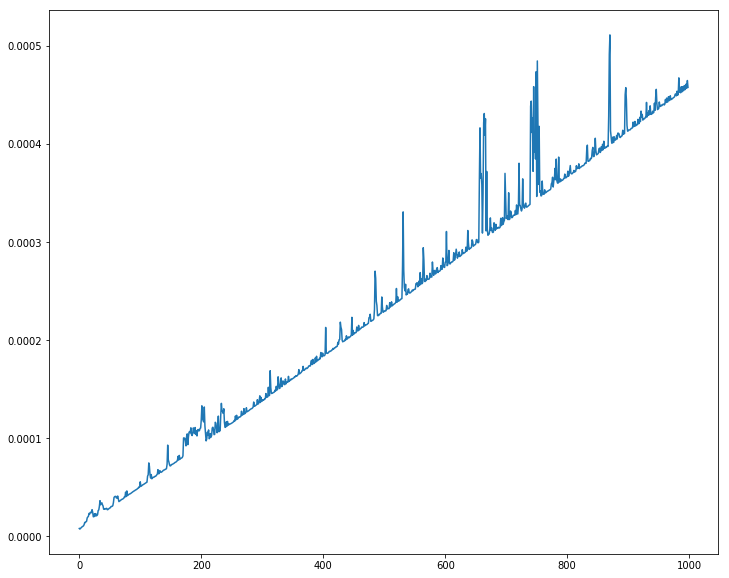

In [28]:
plt.figure(figsize=(12, 10))
plt.plot(times_array)
plt.show()

Попробовал увеличить количество усреднений и уменьшить количество нулей в создаваемых массивах - не помогло сгладить пики. Возможно пики связаны с тем, что иногда создаются массивы, в которых больше нулей в начале массива и алгоритму требуется больше времени, чтобы передвинуть их все в конец.

### Домашнее задание №1 [0.05 балла]

**Условие**:

Написать функцию (-и), которая принимает на вход 3 комплексных числа и выводит минимальное из них по модулю без использования функций min, max, sort и т.д.


**Комментарии**:

1) В процессе сдачи задания, можно будет получить дополнительные баллы

2) Код должен быть пригоден для промышленного использования

In [7]:
a = complex(1, 2)
b = complex(3, 4)
c = complex(10, 12)
d = complex(-2, 4)

In [8]:
def find_min(array):
    min_element = array[0]
    for element in array:
        if element < min_element:
            min_element = element
    return min_element


def complex_min(complex_array):
    length_list = []
    for number in complex_array:
        length_list.append(pow(number.imag**2 + number.real**2, 0.5))
    
    numbers_dic = dict(zip(length_list, complex_array))
    result = numbers_dic[find_min(length_list)]
  
    return result

In [9]:
complex_min([a, b, c, d])

(1+2j)

Проверка на случай вещественных чисел

In [44]:
a = 0
b = 0.2
c = -5
d = 12

In [45]:
complex_min([a, b, c, d])

0

### Домашнее задание №2 [0.18 балла]

**Условие**:

Вы - банкомат, который работает по следующей схеме: считывает номер вставленной в него карты, парсит его на 4 равные части и генерирует 4 числа Фибоначчи с номерами, соответствущими распаршенным частям. Затем генерирует числа из всевозможных перестановок полученных чисел Фибоначчи (конкатенацией).

Для каждого числа из полученного набора банкомат находит НОД с введеным пользователем паролем и возвращает медиану из полученных НОДов. 

**Комментарии**:

1) Поток клиентов большой, операции повторяющиеся - хорошо бы, чтобы со временем банкомат отвечал быстрее на запросы.

2) За неполное решение также дается часть баллов.

**Ключевые слова**: lru_cache, permutations, алгоритм Евклида

In [11]:
import numpy as np
from math import gcd
from functools import lru_cache, reduce
from itertools import permutations
import sys
sys.setrecursionlimit(40000)

@lru_cache(maxsize=None)
def F(n):
    if n < 2:
        return n
    return F(n-1) + F(n-2)


def compute_gcd(x, y):
    if y > x:
        return compute_gcd(y, x)
    
    while y != 0:
        x, y = y, x % y

    return abs(x)

# флаг written_gcd показывает, какой gcd используется: питоновский или тот, что выше (Алгоритм Евклида)
def casher(card_number, card_password, written_gcd=False):
    card_password = int(card_password)
    if card_password <= 0:
        raise Exception('Неверный формат ввода пароля')
    
    if type(card_number) == int:
        if card_number < 0:
            raise Exception('Неверный формат ввода номера карты')
        
        card_number = str(card_number)
        
    if len(card_number) != 16:
        raise Exception('Неверный формат ввода номера карты')
        
    card_split = []
    for i in [0, 4, 8, 12]:
        card_split.append(int(card_number[i:i+4]))
    
    fib_numbers = [F(num) for num in card_split]
    
    gcd_list = []
    for permutation in permutations(fib_numbers):
        concat_of_numbers = int(reduce(lambda x, y: str(x) + str(y), permutation))
        if written_gcd:
            gcd_list.append(compute_gcd(concat_of_numbers, card_password))
        else:
            gcd_list.append(gcd(concat_of_numbers, card_password))
    
    return np.median(gcd_list)

In [12]:
casher('1000000110000001', 25, written_gcd=True)

13.0

In [13]:
casher('1000000110000001', 25, written_gcd=False)

13.0

In [14]:
casher('1000100010000001', 25)

25.0

In [16]:
casher('1000999910009999', 25)

13.0

In [17]:
casher('2418380017189999', 25)

1.0

In [18]:
casher('123556', -25)

Exception: Неверный формат ввода пароля

In [21]:
casher('123556', 25)

Exception: Неверный формат ввода номера карты

In [20]:
casher(-2, 25)

Exception: Неверный формат ввода номера карты

### Домашнее задание №3 [0 - 0.1 балла]

**Условие:**
    
Сравнить скорость работы и потребление памяти list и deque.

**Комментарий:**

Количесвто баллов зависит от полноты сравнения.

Идея такая. Сравним скорость добавления новых элементов к list и deque, а также объем памяти. Параметр step показывает, на сколько увеличивается количество прибавляемых элементов к массиву при каждом новом эксперименте.

In [50]:
import time
from matplotlib import pyplot as plt
from collections import deque
import numpy as np
import sys

def list_deque_compare(array_max_size, step):
    # в эти массивы будем записывать результаты экспериментов
    times_array_list = []
    times_array_deque = []
    size_array_list = []
    size_array_deque = []
    array_for_plots_time = []
    array_for_plots_memory = []
    
    
    # цикл по экспериментам
    for i in range(0, array_max_size, step):
        time_of_work_list = []
        time_of_work_deque = []
        size_list = []
        size_deque = []
        
        # в каждом эксперименте делаем усреднение по 500 итерациям
        for j in range(500):
            list_array = []
            deque_array = deque([])

            t_start_list = time.time()
            list_array.extend([1] * i)       
            time_of_work_list.append(time.time() - t_start_list)
            size_list.append(sys.getsizeof(list_array))

            t_start_deque = time.time()
            deque_array.extend([1] * i)       
            time_of_work_deque.append(time.time() - t_start_deque)
            size_deque.append(sys.getsizeof(deque_array))

        times_array_list.append(np.mean(time_of_work_list))
        times_array_deque.append(np.mean(time_of_work_deque))
        size_array_list.append(np.mean(size_list))
        size_array_deque.append(np.mean(size_deque))
        array_for_plots_time.append((time_of_work_deque, time_of_work_list))
        array_for_plots_memory.append((size_deque, size_list))

    
    # посмотрим сколько раз deque был быстрее list, сколько раз медленне и 
    # насколько в среднем он был быстрее/медленне
    compare_time = np.array(times_array_deque) - np.array(times_array_list)
    mean_difference_time = np.mean(compare_time)
    deque_faster = np.sum(compare_time < 0)
    deque_slower = np.sum(compare_time > 0)
    
    # сравним память
    compare_memory = np.array(size_array_deque) - np.array(size_array_list)
    mean_difference_size = np.mean(compare_memory)
    deque_more_memory = np.sum(compare_memory > 0)
    deque_less_memory = np.sum(compare_memory < 0)
    
    return deque_faster, deque_slower, np.round(mean_difference_time, 7), \
            deque_less_memory, deque_more_memory, np.round(mean_difference_size, 7), \
                compare_time, compare_memory, array_for_plots_time, array_for_plots_memory



Посмотрим на результаты эксперимента. Мы прибавляли от нуля до одного миллиона элементов с шагом в 100 000 элементов. Во всех случаях deque отработал медленне (в среднем на 0.0011501 c). В 9 случаях ему потребовалось меньше памяти, чем list (в среднем на ~0.3 мб).

In [58]:
comparison_1 = list_deque_compare(10**6, 10**5)

In [60]:
comparison_1[:6]

(0, 10, 0.0011501, 9, 1, -337107.2)

Проведем еще одно испытание в котором будут прибавлятся массивы меньшего размера.

In [44]:
comparison_2 = list_deque_compare(10**4, 1000)

Здесь получились аналогичные результаты. В 10 случаях из 10 deque работает медленее (в среднем на 9.4e-06 с), но и памяти занимает меньше в 9 случаях из 10 (в среднем на 0.0003 мб).

In [45]:
comparison_2[:6]

(0, 10, 9.4e-06, 9, 1, -3068.0)

In [53]:
print('25, 50 и 75 персентили времени работы у deque', np.quantile(comparison_2[-2][9][0], [0.25, 0.5, 0.75]))
print('25, 50 и 75 персентили времени работы у list', np.quantile(comparison_2[-2][9][1], [0.25, 0.5, 0.75]))

25, 50 и 75 персентили времени работы у deque [5.07831573e-05 5.10215759e-05 5.10215759e-05]
25, 50 и 75 персентили времени работы у list [3.19480896e-05 3.21865082e-05 3.29017639e-05]


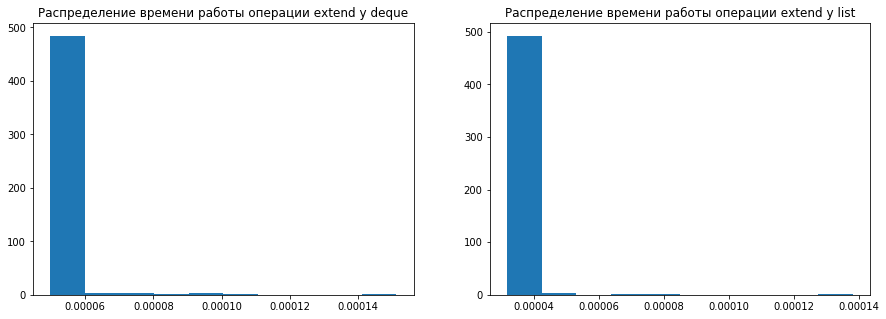

In [54]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.hist(comparison_2[-2][9][0])
plt.title('Распределение времени работы операции extend у deque')
plt.subplot(1, 2, 2)
plt.hist(comparison_2[-2][9][1])
plt.title('Распределение времени работы операции extend у list')
plt.show()

In [56]:
print('25, 50 и 75 персентили памяти у deque', np.quantile(comparison_2[-1][9][0], [0.25, 0.5, 0.75]))
print('25, 50 и 75 персентили памяти у list', np.quantile(comparison_2[-1][9][1], [0.25, 0.5, 0.75]))

25, 50 и 75 персентили памяти у deque [74552. 74552. 74552.]
25, 50 и 75 персентили памяти у list [81112. 81112. 81112.]


Теперь сравним как работает pop. Здесь будем замерять только время, т.к. память мы измеряли в предыдущей функции.

In [31]:
import time
from matplotlib import pyplot as plt
from collections import deque
import numpy as np
import sys

def compare_list_deque_pop(array_max_size, step):
    # в эти массивы будем записывать результаты экспериментов
    times_array_list = []
    times_array_deque = []
    list_experiments_for_plots = []
    deque_experiments_for_plots = []
    
    # цикл по экспериментам
    for i in range(0, array_max_size, step):
        time_of_work_list = []
        time_of_work_deque = []
        
        # в каждом эксперименте делаем усреднение по 500 итерациям
        for j in range(500):
            list_array = [1] * (array_max_size + step)
            deque_array = deque([1] * (array_max_size + step))
            t_start_list = time.time()
            for k in range(i):
                list_array.pop()       
            time_of_work_list.append(time.time() - t_start_list)

            t_start_deque = time.time()
            for k in range(i):
                deque_array.pop()           
            time_of_work_deque.append(time.time() - t_start_deque)

        times_array_list.append(np.mean(time_of_work_list))
        times_array_deque.append(np.mean(time_of_work_deque))
        list_experiments_for_plots.append(time_of_work_list)
        deque_experiments_for_plots.append(time_of_work_deque)
    
    # посмотрим сколько раз deque был быстрее list, сколько раз медленне и 
    # насколько в среднем он был быстрее/медленне
    compare_time = np.array(times_array_deque) - np.array(times_array_list)
    mean_difference_time = np.mean(compare_time)
    deque_faster = np.sum(compare_time < 0)
    deque_slower = np.sum(compare_time > 0)
    
    return deque_faster, deque_slower, np.round(mean_difference_time, 7), compare_time, \
        list_experiments_for_plots, deque_experiments_for_plots

In [32]:
comparison_3 = compare_list_deque_pop(10**4, 1000)

В десяти случаях из десяти deque оказался быстрее (в среднем на -7.81e-05 с)

In [33]:
comparison_3[:3]

(10, 0, -7.81e-05)

Посмотрим на гистограммы и квантили для одного из экспериментов.

In [41]:
print('25, 50 и 75 персентили времени работы у deque', np.quantile(comparison_3[5][9], [0.25, 0.5, 0.75]))
print('25, 50 и 75 персентили времени работы у list', np.quantile(comparison_3[4][9], [0.25, 0.5, 0.75]))

25, 50 и 75 персентили времени работы у deque [0.00055504 0.00055504 0.00055599]
25, 50 и 75 персентили времени работы у list [0.00070095 0.00070095 0.00070119]


Квантили и графики распределений также говорят в пользу deque

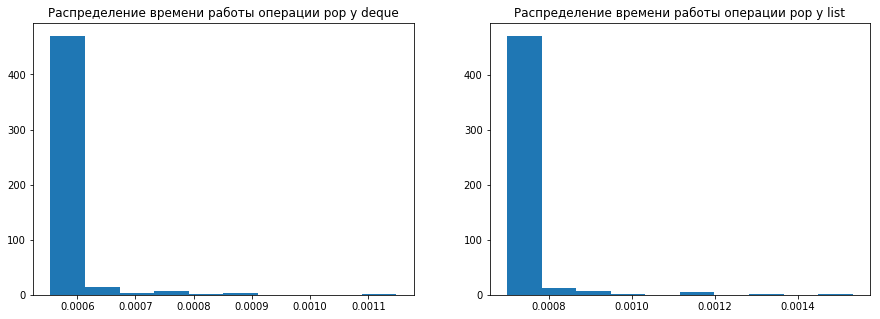

In [38]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.hist(comparison_3[5][9])
plt.title('Распределение времени работы операции pop у deque')
plt.subplot(1, 2, 2)
plt.hist(comparison_3[4][9])
plt.title('Распределение времени работы операции pop у list')
plt.show()

Согласно документации deque являются более эффективными по памяти, чем list, что подтверждается экспериментами.

### Домашнее задание №4 [0 - 0.1 балла]

**Условие:**
    
Написать аналог permutations и провести сравнение скорости работы и потребления памяти.

**Комментарий:**

Количесвто баллов зависит от полноты сравнения.

Реализовал алгоритм Хипса (Heap's algorithm) https://en.wikipedia.org/wiki/Heap%27s_algorithm

In [1]:
def generate_permutations(k, array):
    if k == 1:
        yield array
        
    else:
        for i in range(k):
            for permutation in generate_permutations(k - 1, array):
                yield permutation
                
            if k % 2 == 0:
                array[i], array[k-1] = array[k-1], array[i]
            else:
                array[0], array[k-1] = array[k-1], array[0]
    

25, 50, 75 квантили itertools для массива из 1 элементов [0. 0. 0.]
25, 50, 75 квантили Heaps для массива из 1 элементов [0. 0. 0.]
25, 50, 75 квантили itertools для массива из 2 элементов [0. 0. 0.]
25, 50, 75 квантили Heaps для массива из 2 элементов [0. 0. 0.]
25, 50, 75 квантили itertools для массива из 3 элементов [0. 0. 0.]
25, 50, 75 квантили Heaps для массива из 3 элементов [0. 0. 0.]
25, 50, 75 квантили itertools для массива из 4 элементов [0. 0. 0.]
25, 50, 75 квантили Heaps для массива из 4 элементов [0. 0. 0.]
25, 50, 75 квантили itertools для массива из 5 элементов [0. 0. 0.]
25, 50, 75 квантили Heaps для массива из 5 элементов [0. 0. 0.]
25, 50, 75 квантили itertools для массива из 6 элементов [0. 0. 0.]
25, 50, 75 квантили Heaps для массива из 6 элементов [0.00099707 0.00099754 0.00099874]
25, 50, 75 квантили itertools для массива из 7 элементов [0.         0.         0.00099665]
25, 50, 75 квантили Heaps для массива из 7 элементов [0.0069809  0.00698185 0.00795329]
25, 

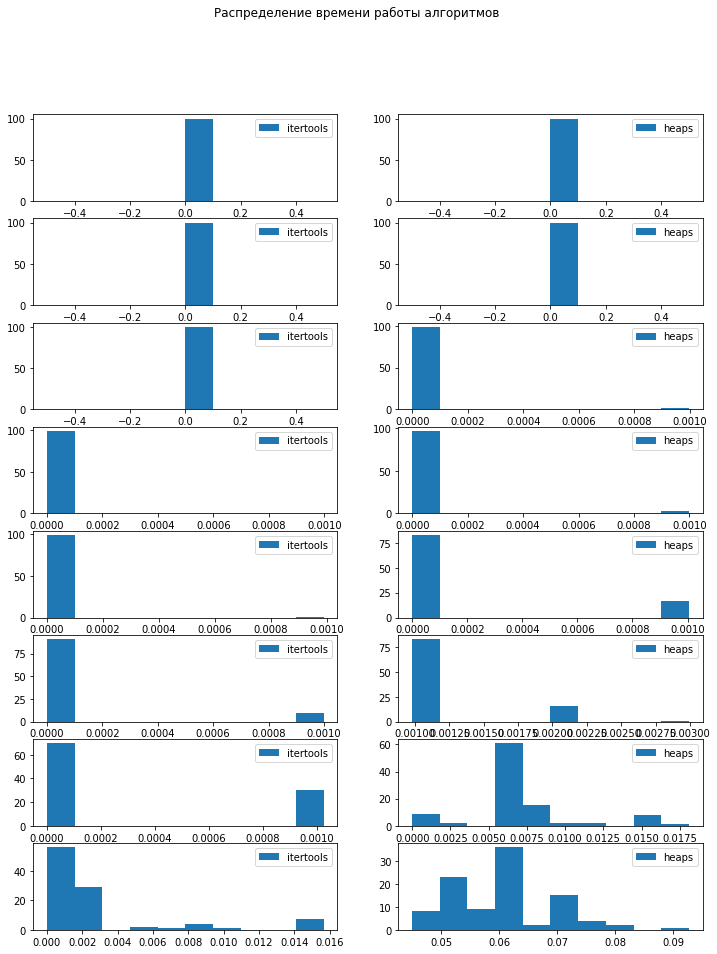

In [10]:
import time
from matplotlib import pyplot as plt
import numpy as np
from itertools import permutations
from tqdm import tqdm_notebook
import seaborn as sns

itertools_time = []
heaps_time = []

plt.figure(figsize=(12, 15))
plt.suptitle('Распределение времени работы алгоритмов')

N_experiments = 9 # максимальное количество элементов в массиве, предназначенном для перестановок
for i in tqdm_notebook(range(1, N_experiments)):
    time_of_work_itertools_permutations = []
    time_of_work_heaps_permutations = []
    array_for_permutations = np.arange(i)
    for j in range(100):
        t_start = time.time()
        for permutation in permutations(array_for_permutations):
            pass
        time_of_work_itertools_permutations.append(time.time() - t_start)
        
        t_start = time.time()
        for permutation in generate_permutations(i, array_for_permutations):
            pass
        time_of_work_heaps_permutations.append(time.time() - t_start)
        
        
    itertools_time.append(np.mean(time_of_work_itertools_permutations))
    heaps_time.append(np.mean(time_of_work_heaps_permutations))
    
    print('25, 50, 75 квантили itertools для массива из {} элементов'.format(i), 
          np.quantile(time_of_work_itertools_permutations, [0.25, 0.5, 0.75]))
    print('25, 50, 75 квантили Heaps для массива из {} элементов'.format(i), 
          np.quantile(time_of_work_heaps_permutations, [0.25, 0.5, 0.75]))
    
    plt.subplot(len(range(1, N_experiments)), 2, 2*i-1)
    #sns.distplot(time_of_work_itertools_permutations, hist=False, label='itertools', color='lightgreen')
    plt.hist(time_of_work_itertools_permutations, label='itertools')
    plt.legend()
    plt.subplot(len(range(1, N_experiments)), 2, 2*i)
    plt.hist(time_of_work_heaps_permutations, label='heaps')
    #sns.distplot(time_of_work_heaps_permutations, hist=False, label='heaps', color='salmon')
    plt.legend()

Для маленьких массивов (примерно до длины 5-6) алгоритмы работают одинаково быстро. При увеличении количества элементов моя реализация начинает сильно проигрывать, что видно как на графиках, так и по квантилям. Если увеличить количество экспериментов (N_experiments), то разница становится еще более очевидна.

In [ ]:
#! pip install memory_profiler

In [2]:
%load_ext memory_profiler

In [7]:
%memit permutations([1, 2, 3, 4, 5, 6])

peak memory: 42.98 MiB, increment: 0.01 MiB


In [8]:
%memit generate_permutations(6, [1, 2, 3, 4, 5, 6])

peak memory: 42.99 MiB, increment: 0.01 MiB


In [5]:
%memit permutations([1, 2, 3, 4, 5, 6, 7, 8, 9])

peak memory: 42.93 MiB, increment: 0.03 MiB


In [6]:
%memit generate_permutations(9, [1, 2, 3, 4, 5, 6, 7, 8, 9])

peak memory: 42.96 MiB, increment: 0.01 MiB


Обе реализации генераторы, видимо поэтому они занимают одинаково памяти